In [107]:
from format_train_test import *
import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [108]:
filename = '../data/train_X_y.csv'
buoyID_train = [46005, 46059]
buoyID_test = [46026]

# getting the testing and traing data
data_train_46005 = get_train_bouys(filename, buoyID_train[0])
data_train_46059 = get_train_bouys(filename, buoyID_train[1])
data_test_46026  = get_train_bouys(filename, buoyID_test)

# adding the arrival time column to the data frame
data_train_46005_t = adding_speed_col(data_train_46005,1141)
data_train_46059_t = adding_speed_col(data_train_46059,620)

# adding time delta for the data frames
data_train_46005_t = add_time_delta(data_train_46005_t)
data_train_46059_t = add_time_delta(data_train_46059_t)

# adding time to time_delta
data_train_46005_t = add_time_y(data_train_46005_t)
data_train_46059_t = add_time_y(data_train_46059_t)

#rounding time
data_train_46005_t = round_time_y(data_train_46005_t)
data_train_46059_t = round_time_y(data_train_46059_t)

data_X_y_46005 = pd.merge(data_train_46005_t, data_test_46026, left_on='time_y_hr', right_index=True)
data_X_y_46059 = pd.merge(data_train_46059_t, data_test_46026, left_on='time_y_hr', right_index=True)

In [111]:
data_X_y_46005.head()

,YY_x,MM_x,DD_x,hh_x,WD_x,WSPD_x,GST_x,WVHT_x,DPD_x,APD_x,...,WVHT_y,DPD_y,APD_y,MWD_y,BAR_y,ATMP_y,WTMP_y,DEWP_y,VIS_y,ID_y
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-01 23:00:00,2007,1,1,23,212.0,14.9,19.1,4.24,12.12,6.78,...,1.93,12.90,7.19,251.0,1022.2,11.6,11.3,6.2,NaN,46026
2007-01-02 01:00:00,2007,1,2,1,227.0,12.0,14.8,4.32,12.12,7.14,...,1.91,12.12,7.54,251.0,1022.9,11.6,11.3,6.2,NaN,46026
2007-01-02 05:00:00,2007,1,2,5,217.0,8.1,11.1,4.13,12.12,7.42,...,2.23,12.12,8.07,251.0,1021.3,11.5,11.6,6.2,NaN,46026
2007-01-02 06:00:00,2007,1,2,6,212.0,9.5,11.7,4.16,12.12,7.60,...,2.25,12.90,7.94,251.0,1020.7,11.5,11.6,6.2,NaN,46026
2007-01-02 08:00:00,2007,1,2,8,226.0,12.5,15.9,3.95,12.90,6.91,...,1.88,12.12,7.22,251.0,1021.0,11.4,11.6,6.2,NaN,46026


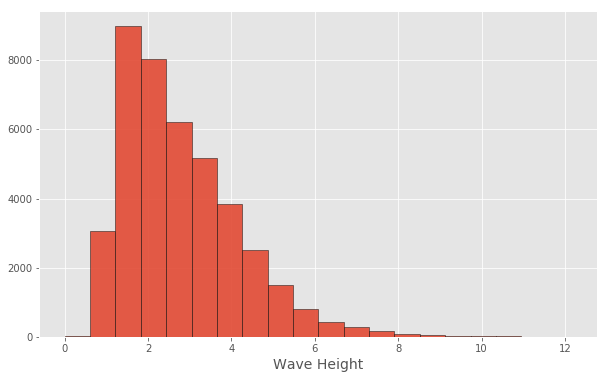

In [137]:
fig, ax = plt.subplots(figsize=(10,6))
data_train_46005['WVHT'].hist(bins=20,alpha=0.9, edgecolor='k')
ax.set_xlabel('Wave Height', fontsize=14)
plt.savefig('WaveHeightEx.png')

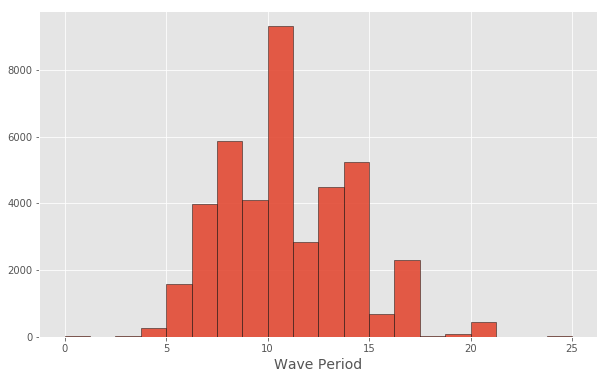

In [138]:
fig, ax = plt.subplots(figsize=(10,6))
data_train_46005['DPD'].hist(bins=20,alpha=0.9, edgecolor='k')
ax.set_xlabel('Wave Period', fontsize=14)
plt.savefig('WavePeriodEx.png')

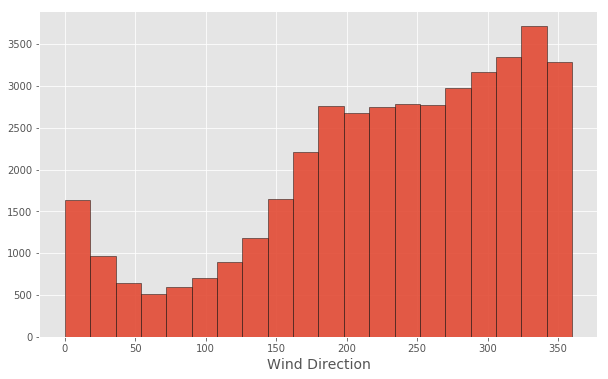

In [139]:
fig, ax = plt.subplots(figsize=(10,6))
data_train_46005['WD'].hist(bins=20,alpha=0.9, edgecolor='k')
ax.set_xlabel('Wind Direction', fontsize=14)
plt.savefig('Wind Direction.png')

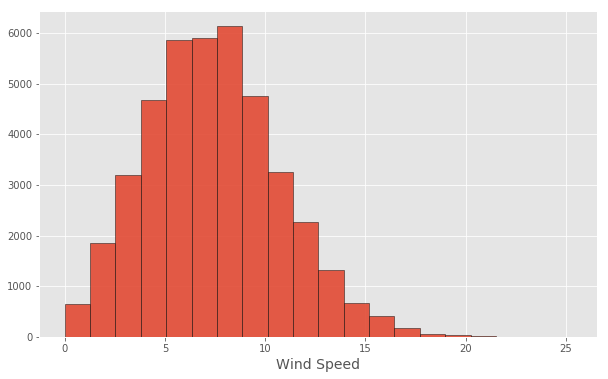

In [140]:
fig, ax = plt.subplots(figsize=(10,6))
data_train_46005['WSPD'].hist(bins=20,alpha=0.9, edgecolor='k')
ax.set_xlabel('Wind Speed', fontsize=14)
plt.savefig('WindSpeedEx.png')

In [91]:
data_test_46026.head()

,YY,MM,DD,hh,WD,WSPD,GST,WVHT,DPD,APD,MWD,BAR,ATMP,WTMP,DEWP,VIS,ID
Date,,,,,,,,,,,,,,,,,
2007-01-01 00:00:00,2007,1,1,0,290.0,3.1,4.5,2.42,13.79,10.12,251.0,1025.5,10.9,11.8,6.2,NaN,46026
2007-01-01 01:00:00,2007,1,1,1,334.0,3.5,5.6,2.63,12.90,10.45,251.0,1025.7,10.8,11.8,6.2,NaN,46026
2007-01-01 02:00:00,2007,1,1,2,302.0,3.8,5.5,2.30,12.12,9.64,251.0,1025.9,10.8,11.8,6.2,NaN,46026
2007-01-01 03:00:00,2007,1,1,3,316.0,3.9,6.5,2.50,12.90,9.95,251.0,1026.0,10.7,11.8,6.2,NaN,46026
2007-01-01 04:00:00,2007,1,1,4,317.0,4.7,5.8,2.38,12.90,9.59,251.0,1026.0,10.6,11.8,6.2,NaN,46026


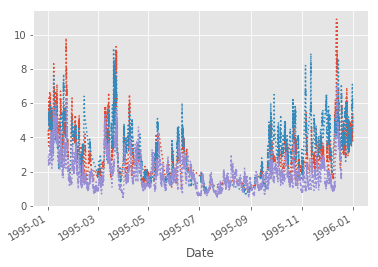

In [71]:
data_train_46059_t['1995']['WVHT'].plot(linestyle=':')
data_train_46005_t['1995']['WVHT'].plot(linestyle=':')
data_test_46026['1995']['WVHT'].plot(linestyle=':') 


In [20]:
data_train_46059.head()

,YY,MM,DD,hh,WD,WSPD,GST,WVHT,DPD,APD,MWD,BAR,ATMP,WTMP,DEWP,VIS,ID
Date,,,,,,,,,,,,,,,,,
2007-01-01 00:00:00,2007,1,1,0,251.0,5.1,6.2,2.91,12.5,8.39,NaN,1025.3,13.7,13.4,NaN,NaN,46059
2007-01-01 01:00:00,2007,1,1,1,254.0,4.4,5.4,2.43,12.5,7.96,NaN,1024.8,14.1,13.4,NaN,NaN,46059
2007-01-01 02:00:00,2007,1,1,2,258.0,6.1,7.0,2.45,12.5,8.28,NaN,1025.4,13.8,13.4,NaN,NaN,46059
2007-01-01 03:00:00,2007,1,1,3,259.0,4.8,5.8,2.36,12.5,8.47,NaN,1025.7,13.7,13.3,NaN,NaN,46059
2007-01-01 04:00:00,2007,1,1,4,264.0,5.0,6.0,2.36,12.5,8.61,NaN,1026.2,13.7,13.4,NaN,NaN,46059


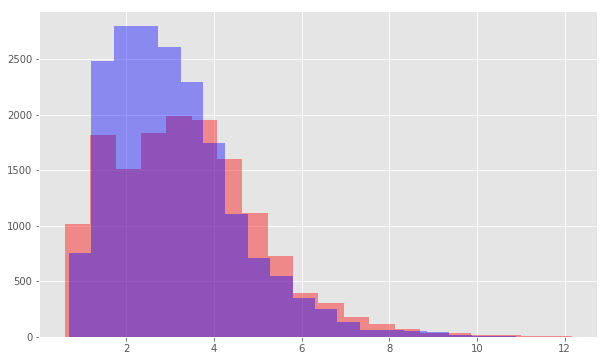

In [25]:
fig, ax = plt.subplots(figsize=(10,6))
data_train_46005_t['WVHT'].hist(bins = 20, ax=ax, alpha=0.4, color='r')
data_train_46059_t['WVHT'].hist(bins = 20, ax=ax, alpha=0.4, color='b')

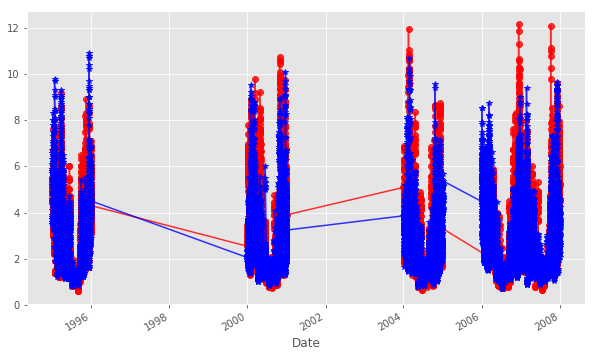

In [26]:
fig, ax = plt.subplots(figsize=(10,6))
data_train_46005_t['WVHT'].plot(ax=ax, alpha=0.8, color='r',marker='o')
data_train_46059_t['WVHT'].plot(ax=ax, alpha=0.8, color='b',marker='*')

In [27]:
data_train_46005_t['time_delta'] = data_train_46005_t['t_arrive'].apply(lambda x: datetime.timedelta(x/24))
data_train_46059_t['time_delta'] = data_train_46059_t['t_arrive'].apply(lambda x: datetime.timedelta(x/24))

/Users/abdulla/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/abdulla/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [28]:
data_train_46005_t.head()

,YY,MM,DD,hh,WD,WSPD,GST,WVHT,DPD,APD,MWD,BAR,ATMP,WTMP,DEWP,VIS,ID,t_arrive,time_delta
Date,,,,,,,,,,,,,,,,,,,
2007-01-01 23:00:00,2007,1,1,23,212.0,14.9,19.1,4.24,12.12,6.78,NaN,1010.5,11.9,10.5,NaN,NaN,46005,16.749097,16:44:56.747404
2007-01-02 01:00:00,2007,1,2,1,227.0,12.0,14.8,4.32,12.12,7.14,NaN,1010.5,11.9,10.4,NaN,NaN,46005,16.749097,16:44:56.747404
2007-01-02 05:00:00,2007,1,2,5,217.0,8.1,11.1,4.13,12.12,7.42,NaN,1009.1,11.4,10.5,NaN,NaN,46005,16.749097,16:44:56.747404
2007-01-02 06:00:00,2007,1,2,6,212.0,9.5,11.7,4.16,12.12,7.60,NaN,1008.3,11.5,10.5,NaN,NaN,46005,16.749097,16:44:56.747404
2007-01-02 08:00:00,2007,1,2,8,226.0,12.5,15.9,3.95,12.90,6.91,NaN,1007.3,11.9,10.4,NaN,NaN,46005,15.736360,15:44:10.897561


In [30]:
data_train_46005_t['time_y'] = data_train_46005_t.index + data_train_46005_t['time_delta']
data_train_46059_t['time_y'] = data_train_46059_t.index + data_train_46059_t['time_delta']

/Users/abdulla/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/abdulla/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [31]:
data_train_46005_t.head()

,YY,MM,DD,hh,WD,WSPD,GST,WVHT,DPD,APD,MWD,BAR,ATMP,WTMP,DEWP,VIS,ID,t_arrive,time_delta,time_y
Date,,,,,,,,,,,,,,,,,,,,
2007-01-01 23:00:00,2007,1,1,23,212.0,14.9,19.1,4.24,12.12,6.78,NaN,1010.5,11.9,10.5,NaN,NaN,46005,16.749097,16:44:56.747404,2007-01-02 15:44:56.747404
2007-01-02 01:00:00,2007,1,2,1,227.0,12.0,14.8,4.32,12.12,7.14,NaN,1010.5,11.9,10.4,NaN,NaN,46005,16.749097,16:44:56.747404,2007-01-02 17:44:56.747404
2007-01-02 05:00:00,2007,1,2,5,217.0,8.1,11.1,4.13,12.12,7.42,NaN,1009.1,11.4,10.5,NaN,NaN,46005,16.749097,16:44:56.747404,2007-01-02 21:44:56.747404
2007-01-02 06:00:00,2007,1,2,6,212.0,9.5,11.7,4.16,12.12,7.60,NaN,1008.3,11.5,10.5,NaN,NaN,46005,16.749097,16:44:56.747404,2007-01-02 22:44:56.747404
2007-01-02 08:00:00,2007,1,2,8,226.0,12.5,15.9,3.95,12.90,6.91,NaN,1007.3,11.9,10.4,NaN,NaN,46005,15.736360,15:44:10.897561,2007-01-02 23:44:10.897561


In [33]:
data_train_46005_t['time_y_hr']  = data_train_46005_t['time_y'].apply(lambda dt: datetime.datetime(dt.year,
                                                                                                       dt.month,
                                                                                                       dt.day,
                                                                                                       dt.hour,
                                                                                                       0,0))

data_train_46059_t['time_y_hr']  = data_train_46059_t['time_y'].apply(lambda dt: datetime.datetime(dt.year,
                                                                                                       dt.month,
                                                                                                       dt.day,
                                                                                                       dt.hour,
                                                                                                       0,0))

/Users/abdulla/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/abdulla/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [34]:
data_train_46005_t.head()

,YY,MM,DD,hh,WD,WSPD,GST,WVHT,DPD,APD,...,BAR,ATMP,WTMP,DEWP,VIS,ID,t_arrive,time_delta,time_y,time_y_hr
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-01 23:00:00,2007,1,1,23,212.0,14.9,19.1,4.24,12.12,6.78,...,1010.5,11.9,10.5,NaN,NaN,46005,16.749097,16:44:56.747404,2007-01-02 15:44:56.747404,2007-01-02 15:00:00
2007-01-02 01:00:00,2007,1,2,1,227.0,12.0,14.8,4.32,12.12,7.14,...,1010.5,11.9,10.4,NaN,NaN,46005,16.749097,16:44:56.747404,2007-01-02 17:44:56.747404,2007-01-02 17:00:00
2007-01-02 05:00:00,2007,1,2,5,217.0,8.1,11.1,4.13,12.12,7.42,...,1009.1,11.4,10.5,NaN,NaN,46005,16.749097,16:44:56.747404,2007-01-02 21:44:56.747404,2007-01-02 21:00:00
2007-01-02 06:00:00,2007,1,2,6,212.0,9.5,11.7,4.16,12.12,7.60,...,1008.3,11.5,10.5,NaN,NaN,46005,16.749097,16:44:56.747404,2007-01-02 22:44:56.747404,2007-01-02 22:00:00
2007-01-02 08:00:00,2007,1,2,8,226.0,12.5,15.9,3.95,12.90,6.91,...,1007.3,11.9,10.4,NaN,NaN,46005,15.736360,15:44:10.897561,2007-01-02 23:44:10.897561,2007-01-02 23:00:00
